In [1]:
from data_processor import test_loader, unlabeled_loader
import torch
import torch.nn as nn
from torchvision import models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.semi_supervised import LabelSpreading
from models import CNNet, train_model, test_model
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from utils import show_batch

In [2]:
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

In [3]:
transformation = transforms.Compose([
    
     transforms.Resize((100, 100)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-10, 10)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.Grayscale(),
     transforms.ToTensor(),
     ])

In [4]:
train_data_path = './semi_supervised_data/train_data'
#test_data_path = './semi_supervised_data/test_data'

In [5]:
	train_set = datasets.ImageFolder(
	    root=train_data_path,
	    transform = transformation)
    
train_loader = DataLoader(dataset=train_set, batch_size=265, shuffle=True)

In [6]:
model = CNNet().to(device)

In [7]:
trained_model, loss = train_model(model, train_loader, 30)

started training ...
the loss after processing this epoch is:  11.940101146697998
the loss after processing this epoch is:  4.1133913323283195
the loss after processing this epoch is:  3.2715630680322647
the loss after processing this epoch is:  3.0668644346296787
the loss after processing this epoch is:  2.53178895637393
the loss after processing this epoch is:  2.8650781735777855
the loss after processing this epoch is:  2.34729440510273
the loss after processing this epoch is:  2.030904784798622
the loss after processing this epoch is:  1.6672889646142721
the loss after processing this epoch is:  1.638858414720744
the loss after processing this epoch is:  3.141881851479411
the loss after processing this epoch is:  2.0876935459673405
the loss after processing this epoch is:  1.8804637864232063
the loss after processing this epoch is:  1.6024251319468021
the loss after processing this epoch is:  1.1785215241834521
the loss after processing this epoch is:  1.4734352547675371
the loss a

In [8]:
#torch.save(trained_model, "trained_models/trainedCNN_augm")

In [9]:
test_model(trained_model, test_loader)

The classifier accuracy is:  88.0


0.88

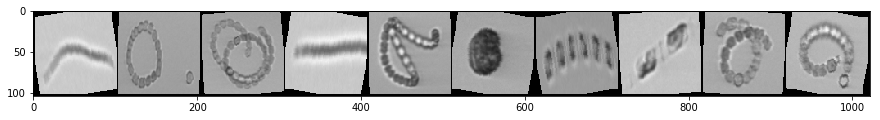

In [10]:
batch_images, labels = next(iter(train_loader))

show_batch(batch_images[:10])